### Q8

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import linregress, t

# Load the data
data = pd.read_csv('/Users/ludong/PROGRAM/112-2/Statistics/hw3/TS.txt', header=None, names=['Temperature'])

#### 8.1 ~ 8.3

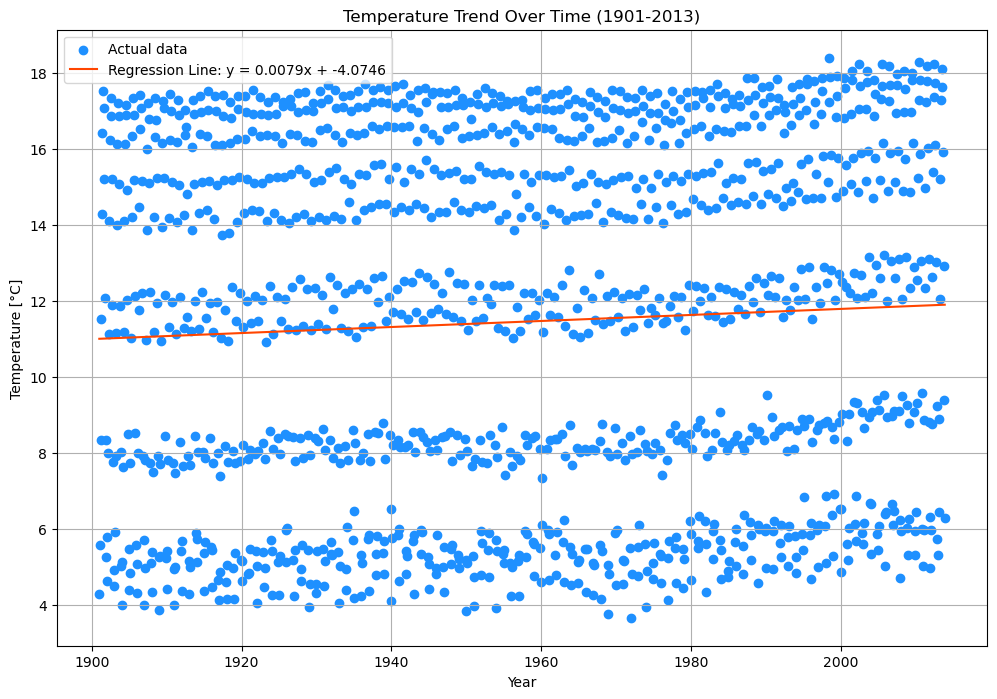

Regression Line: y = 0.0079x + -4.0746
R-squared: 0.0031
P-value: 0.0392


In [2]:
# Prepare the data
X_train = np.arange(1901, 2013 + 1, 1/12)
y_train = data['Temperature']

# Fit the linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(X_train, y_train)

# Prepare the predictions for plotting the trend line
predictions = intercept + slope * X_train

# Plotting the time series and the trend line
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='dodgerblue', label='Actual data')
plt.plot(X_train, predictions, color='orangered', label=f'Regression Line: y = {slope:.4f}x + {intercept:.4f}')
plt.title('Temperature Trend Over Time (1901-2013)')
plt.xlabel('Year')
plt.ylabel('Temperature [°C]')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
print(f"Regression Line: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

#### 8.4 ~ 8.6

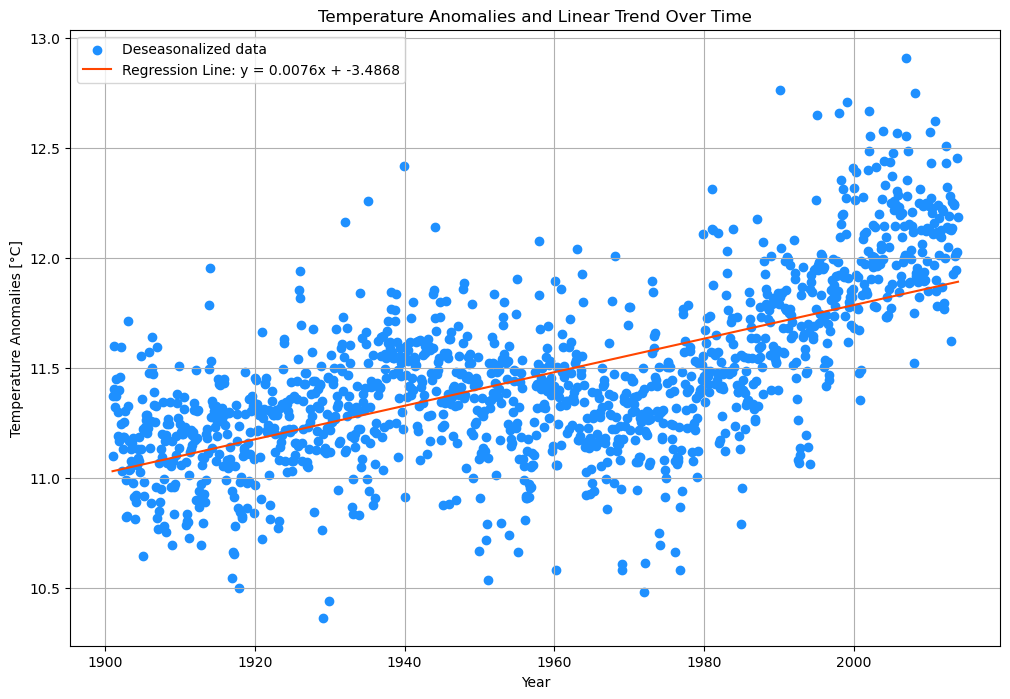

Regression Line: y = 0.0076x + -3.4868
R-squared: 0.4085
P-value: 1.4478890748670055e-156


In [4]:

# Decompose the series to remove the seasonal component
result = seasonal_decompose(data['Temperature'], model='additive', period=12)
data['Deseasonalized'] = data['Temperature'] - result.seasonal  # Subtract the seasonal component

# Fit the linear regression model on deseasonalized data
slope, intercept, r_value, p_value, std_err = linregress(X_train, data['Deseasonalized'])

# Create predictions for plotting
predictions = intercept + slope * X_train

# Plotting the deseasonalized data and the trend line
plt.figure(figsize=(12, 8))
plt.scatter(X_train, data['Deseasonalized'], color='dodgerblue', label='Deseasonalized data')
plt.plot(X_train, predictions, color='orangered', label=f'Regression Line: y = {slope:.4f}x + {intercept:.4f}')
plt.title('Temperature Anomalies and Linear Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomalies [°C]')
plt.legend()
plt.grid(True)
plt.show()

# Print regression results
print(f"Regression Line: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value}")

#### 8.7